<a href="https://colab.research.google.com/github/ash030889/Portfolio_projects/blob/main/insurance_cost_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Step - 1 Import the important libraries for the projects.
##Here, we import numpy and pandas for loading and reading dataset and we import matplotlib.pyplot and seaborn for visualization.

In [15]:
import numpy as np
import pandas as pd
import seaborn as snr
import matplotlib.pyplot as plt


#Step - 2 Data Gathering / Data Loading

In [10]:
data = pd.read_csv('/content/insurance.csv')

#Step - 3 Data preprocessing / Data Cleaning

In [3]:
data.info()   #getting all information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.head()   #get top 5 rows values.

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
pd.isnull(data) #get null value if present.

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
pd.isnull(data).sum()   # get total no. of null valuue by columns.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [28]:
# changing catagogical data into numeric form.
data['sex'] = data['sex'].apply({'female' : 0, 'male' :1}.get)
data['smoker'] = data['smoker'].apply({'no' : 0, 'yes' :1}.get)
data['region'] = data['region'].apply({'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' :4}.get)

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


#Step - 4 Visualization of Dataset.

In [11]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


#sex
##Bar chart with respect to expenses.

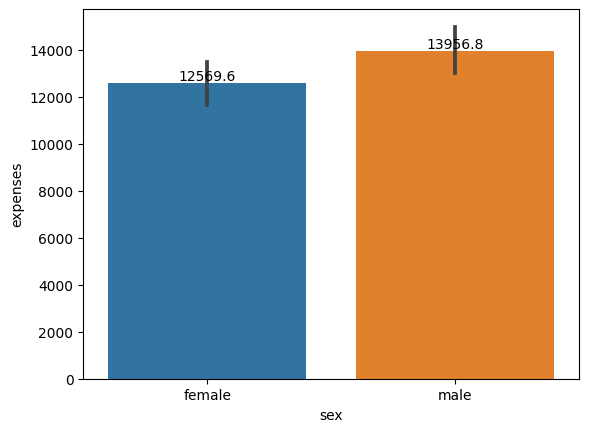

In [24]:
data.groupby(['sex'], as_index = False)['expenses'].sum().sort_values(['expenses'], ascending = False)
ax = snr.barplot(x = 'sex', y = 'expenses', data = data)
for bars in ax.containers:
  ax.bar_label(bars)

#Smoker
##prepare chart with respect to expenses

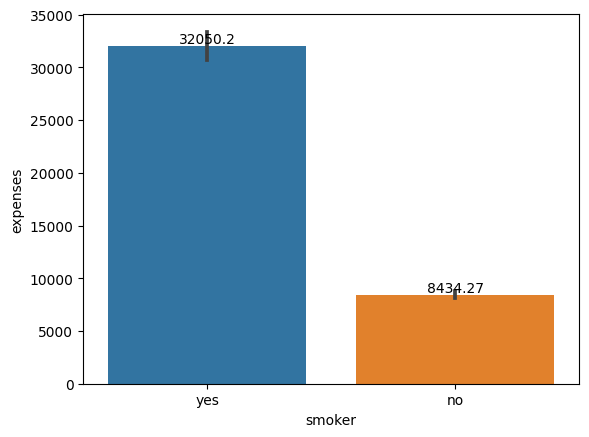

In [25]:
data.groupby(['smoker'], as_index = False)['expenses'].sum().sort_values(['expenses'], ascending = False)
ax = snr.barplot(x = 'smoker', y = 'expenses', data = data)
for bars in ax.containers:
  ax.bar_label(bars)

#children
##prepare chart with respect to expenses

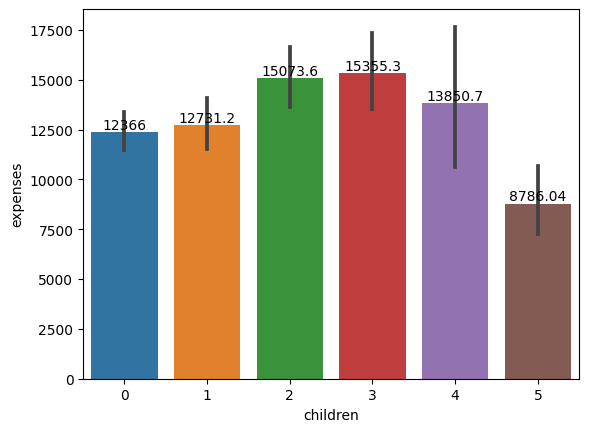

In [26]:
data.groupby(['children'], as_index = False)['expenses'].sum().sort_values(['expenses'], ascending = False)
ax = snr.barplot(x = 'children', y = 'expenses', data = data)
for bars in ax.containers:
  ax.bar_label(bars)

#Region
##prepare chart with respect to expenses

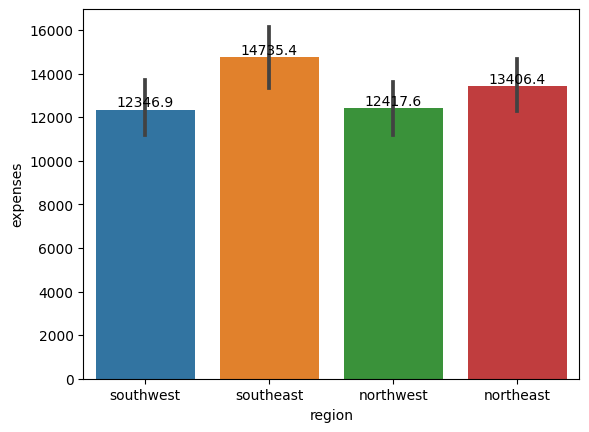

In [27]:
data.groupby(['region'], as_index = False)['expenses'].sum().sort_values(['expenses'], ascending = False)
ax = snr.barplot(x = 'region', y = 'expenses', data = data)
for bars in ax.containers:
  ax.bar_label(bars)

#Clean data dividing into independent (x) and dependent (y) variable.

In [35]:
x = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['expenses']

#Clean data split into train and test.

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8)

# Using the MLM using LinearRegrassion algorithms.

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()    # activing the LinearRegression algorithms.

In [38]:
regression.fit(x_train, y_train)  # .fit() used for training the MLM.

LinearRegression()

In [39]:
predictions = regression.predict(x_test)  # .predict() used to predict the future values.

In [40]:
regression.score(x,y)   # accuracy of MLM.

0.7505515244200431

In the LinearRegression model we can see that acurracy obtained is 75% which is good but we can try another models so we can get better accuracy.

#Using the MLM using DecisionTree algorithms.

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [47]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [48]:
t_prediction = regression.predict(x_test)

In [49]:
regression.score(x,y)

0.7505515244200431

here we used Decision Tree model we can see that acurracy obtained is 75% which is equalto LinearRegression MLM but we can also try another models to get better accuracy or not.

#Using Random Forest MLM

In [54]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

In [55]:
random.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
r_prediction = random.predict(x_test)

In [57]:
random.score(x,y)

0.9444030218395699

here we used Random Forest model we can see that acurracy obtained is 94% which is quite good. we used three model and realised Random Forest MLM is better than another two model for this insurance dataset.

#calculating the insurance cost for a new customer.

In [ ]:
# creating dataset for new customer.
data_new = {'age' : 65, 'sex' : 1, 'bmi' :29, 'children' : 2, 'smoker' :1, 'region' :3}

In [45]:
index = [1]
my_data = pd.DataFrame(data_new, index)


In [ ]:
my_data

In [58]:
# predicting the insurance cost for a new customer.
new_predictions = random.predict(my_data)
print('insurance cost for the new customer ', new_predictions)

insurance cost for the new customer  [29025.7526]
